# Model Validation

In [1]:
import warnings
warnings.filterwarnings('ignore')

## Model Capacity

* import Packages

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

* pandas DataFrame
 - 'Electric.csv' From github

In [3]:
url = 'https://raw.githubusercontent.com/rusita-ai/pyData/master/Electric.csv'

Elec = pd.read_csv(url)

Elec.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   compactness                768 non-null    float64
 1   surface_area               768 non-null    float64
 2   wall_area                  768 non-null    float64
 3   roof_area                  768 non-null    float64
 4   height                     768 non-null    float64
 5   orientation                768 non-null    int64  
 6   glazing_area               768 non-null    float64
 7   glazing_area_distribution  768 non-null    int64  
 8   electricity                768 non-null    float64
dtypes: float64(7), int64(2)
memory usage: 54.1 KB


In [4]:
# y=electricity, x=surface_area
Elec.head() 

,compactness,surface_area,wall_area,roof_area,height,orientation,glazing_area,glazing_area_distribution,electricity
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,155.5
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,155.5
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,155.5
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,155.5
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,208.4


### 산점도(surface_area vs. electricity)

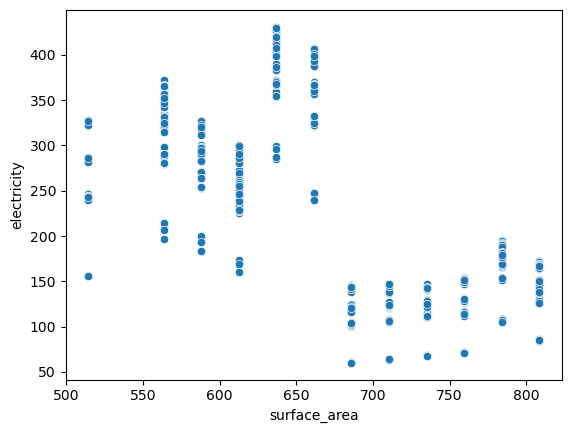

In [5]:
sns.scatterplot(x = Elec['surface_area'], y = Elec['electricity'])
plt.show()

### 1차 모델 시각화

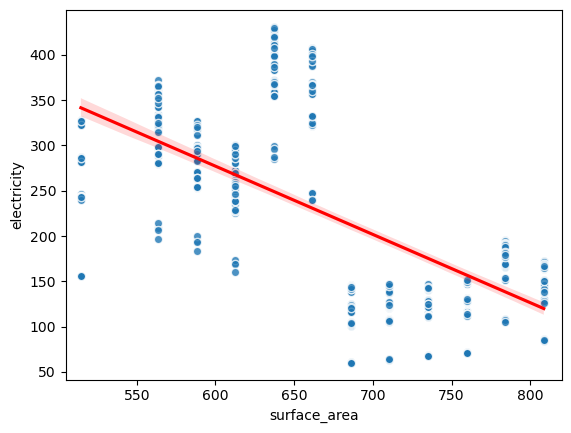

In [8]:
sns.regplot(x = 'surface_area', y = 'electricity', data = Elec,
            line_kws = {'color':'red'},
            scatter_kws = {'edgecolor' : 'white'})
plt.xlim(505, 820)
plt.show()

### 2차 모델 시각화

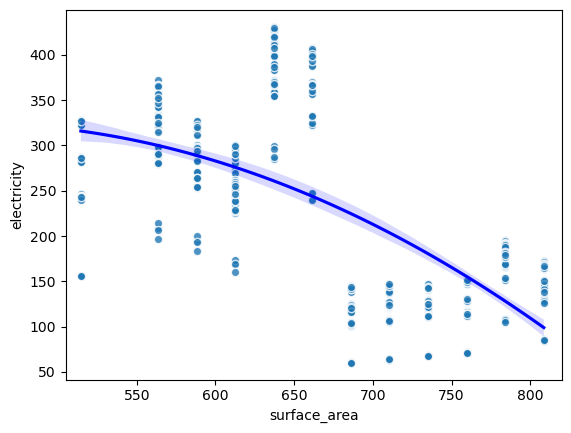

In [9]:
sns.regplot(x = 'surface_area', y = 'electricity', data = Elec,
            line_kws = {'color':'blue'},
            scatter_kws = {'edgecolor' : 'white'},
            order = 2) # order 다항식 회귀식을 위한 항의 개수
plt.xlim(505, 820)
plt.show()

### 5차 모델 시각화

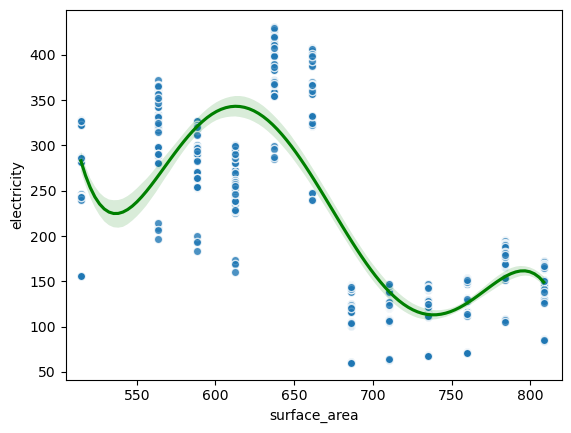

In [10]:
sns.regplot(x = 'surface_area', y = 'electricity', data = Elec,
            line_kws = {'color':'green'},
            scatter_kws = {'edgecolor' : 'white'},
            order = 5)
plt.xlim(505, 820)
plt.show()

### 9차 모델 시각화

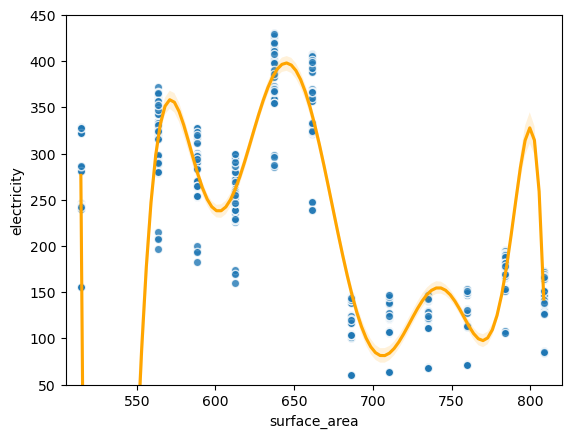

In [11]:
sns.regplot(x = 'surface_area', y = 'electricity', data = Elec,
            line_kws = {'color':'orange'},
            scatter_kws = {'edgecolor':'white'},
            order = 9)
plt.xlim(505, 820)
plt.ylim(50, 450)
plt.show()

### 4개 모델 비교 시각화

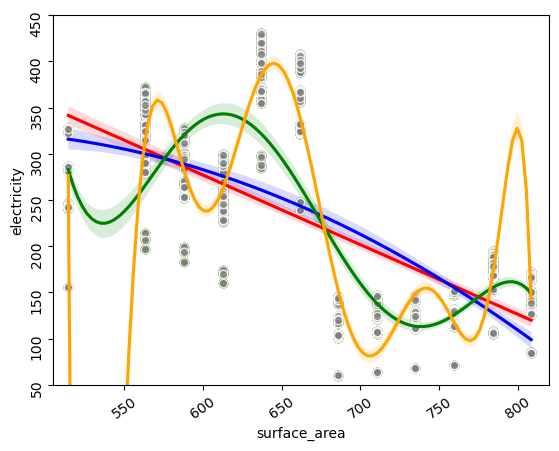

In [12]:
sns.regplot(x = 'surface_area', y = 'electricity', 
            data = Elec, 
            line_kws = {'color':'red'})
sns.regplot(x = 'surface_area', y = 'electricity', 
            data = Elec, 
            line_kws = {'color':'blue'}, order = 2)
sns.regplot(x = 'surface_area', y = 'electricity', 
            data = Elec, 
            line_kws = {'color':'green'}, order = 5)
sns.regplot(x = 'surface_area', y = 'electricity', 
            data = Elec, 
            line_kws = {'color':'orange'}, order = 9,
            scatter_kws = {'color':'gray', 'edgecolor':'white'})
plt.xlim(505, 820)
plt.ylim(50, 450)
plt.xticks(rotation = 35)
plt.yticks(rotation = 90)
plt.show()

## Training Error
* import Packages

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

* pandas DataFrame
 - 'Electric.csv' From github

In [10]:
url = 'https://raw.githubusercontent.com/rusita-ai/pyData/master/Electric.csv'

Elec = pd.read_csv(url)

Elec.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   compactness                768 non-null    float64
 1   surface_area               768 non-null    float64
 2   wall_area                  768 non-null    float64
 3   roof_area                  768 non-null    float64
 4   height                     768 non-null    float64
 5   orientation                768 non-null    int64  
 6   glazing_area               768 non-null    float64
 7   glazing_area_distribution  768 non-null    int64  
 8   electricity                768 non-null    float64
dtypes: float64(7), int64(2)
memory usage: 54.1 KB


### 1차 모델 Training Error

* X_train and y_train

In [11]:
X_train = Elec[['surface_area']]
y_train = Elec['electricity']

X_train.shape, y_train.shape

((768, 1), (768,))

In [12]:
X_train.head()

,surface_area
0,514.5
1,514.5
2,514.5
3,514.5
4,563.5


* 모델 생성

In [13]:
from sklearn.linear_model import LinearRegression

Model_1 = LinearRegression()
Model_1.fit(X_train, y_train)

LinearRegression()

* 모델 정보(학습결과) 확인

In [14]:
print(Model_1.coef_) # w
print(Model_1.intercept_) # b

[-0.75387157]
729.4538243006995


* y_hat(예측값) 생성

In [15]:
y_hat_1 = Model_1.predict(X_train)

len(y_hat_1)

768

* MSE(Mean Squared Error) 계산

In [16]:
TR_Err_1 = np.mean((y_train - y_hat_1) ** 2)
TR_Err_1

5763.983779426344

### 5차 모델 Training Error

* X 다항차수 변환
 - (768, 1) to (768, 5)

In [29]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree = 5, include_bias = False)
PX_5 = poly.fit_transform(X_train)

In [30]:
X_train[:3]

,surface_area
0,514.5
1,514.5
2,514.5


In [31]:
PX_5[:3]

array([[5.145000000000000e+02, 2.647102500000000e+05,
        1.361934236250000e+08, 7.007151645506250e+10,
        3.605179521612966e+13],
       [5.145000000000000e+02, 2.647102500000000e+05,
        1.361934236250000e+08, 7.007151645506250e+10,
        3.605179521612966e+13],
       [5.145000000000000e+02, 2.647102500000000e+05,
        1.361934236250000e+08, 7.007151645506250e+10,
        3.605179521612966e+13]])

In [32]:
X_train.shape, PX_5.shape

((768, 1), (768, 5))

* 5차 모델 생성

In [33]:
from sklearn.linear_model import LinearRegression

Model_5 = LinearRegression()
Model_5.fit(PX_5, y_train)

LinearRegression()

* 모델 정보(학습결과) 확인

In [34]:
np.set_printoptions?

In [35]:
# precision 부동소수점 출력의 정밀도 자릿수(기본값 8)
# suppress False인 경우 과학적 표기법 사용(True인 경우 항상 고정소수점으로 부동소수점숫자 출력)
np.set_printoptions(suppress = True, precision = 40)

print(Model_5.coef_)
print(Model_5.intercept_)

[-0.0003155143830681223        -0.10292961479298418
  0.00037876136790860855       -0.0000005032062987328187
  0.00000000022980589274026736]
2906.2246748780735


* y_hat(예측값) 생성

In [36]:
PX_5_pred = poly.fit_transform(X_train)

y_hat_5 = Model_5.predict(PX_5_pred)

y_hat_5.shape

(768,)

* MSE(Mean Squared Error) 계산

In [37]:
TR_Err_5 = np.mean((y_train - y_hat_5) ** 2)
TR_Err_5

4177.726328413669

### 9차 모델 Training Error

* X 다항차수 변환
 - (768, 1) to (768, 9)

In [22]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree = 9, include_bias = False)
PX_9 = poly.fit_transform(X_train)

In [23]:
X_train.shape, PX_9.shape

((768, 1), (768, 9))

* 모델 생성

In [24]:
from sklearn.linear_model import LinearRegression

Model_9 = LinearRegression()
Model_9.fit(PX_9, y_train)

LinearRegression()

* 모델 정보(학습결과) 확인

In [25]:
print(Model_9.coef_)
print(Model_9.intercept_)

[ 0.0000000000000000000000000479174184661133
  0.0000000000000000003618224209436787
  0.000000000000000000021862057126724178
  0.000000000000000009606888761890881
  0.0000000000000031773264062072504
  0.0000000000006336691114049528
 -0.000000000000002288058964105876
  0.0000000000000000027751494738404858
 -0.0000000000000000000011271003953323446   ]
-440.08258376469996


* y_hat(예측값) 생성

In [26]:
PX_9_pred = poly.fit_transform(X_train)

y_hat_9 = Model_9.predict(PX_9_pred)

y_hat_9.shape

(768,)

* MSE(Mean Squared Error) 계산

In [27]:
TR_Err_9 = np.mean((y_train - y_hat_9) ** 2)
TR_Err_9

4086.7199908149946

### 3개 모델 Training Error 비교

In [38]:
print('1차 모델 : ', TR_Err_1)
print('5차 모델 : ', TR_Err_5)
print('9차 모델 : ', TR_Err_9)

1차 모델 :  5763.983779426344
5차 모델 :  4177.726328413669
9차 모델 :  4086.7199908149946


## Testing Error
* import Packages

In [39]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

* pandas DataFrame
 - 'Electric.csv' From github

In [40]:
url = 'https://raw.githubusercontent.com/rusita-ai/pyData/master/Electric.csv'

Elec = pd.read_csv(url)

Elec.shape

(768, 9)

### Train_Data vs. Test_Data

#### DataFrame Split
* 8:2 Split(614:154)
* 80% Train_DF & 20% Test_DF

In [44]:
from sklearn.model_selection import train_test_split

TR_Elec, TE_Elec = train_test_split(Elec, 
                                    test_size = 0.2, 
                                    random_state = 2045)

In [45]:
TR_Elec.shape, TE_Elec.shape

((614, 9), (154, 9))

* 80% TR_Elec DataFrame

In [46]:
TR_Elec.head()

,compactness,surface_area,wall_area,roof_area,height,orientation,glazing_area,glazing_area_distribution,electricity
555,0.74,686.0,245.0,220.5,3.5,5,0.40,1,145.5
355,0.79,637.0,343.0,147.0,7.0,5,0.25,2,389.8
200,0.86,588.0,294.0,147.0,7.0,2,0.10,4,264.4
669,0.62,808.5,367.5,220.5,3.5,3,0.40,3,163.5
561,0.69,735.0,294.0,220.5,3.5,3,0.40,1,147.0


* 20% TE_Elec DataFrame

In [47]:
TE_Elec.head()

,compactness,surface_area,wall_area,roof_area,height,orientation,glazing_area,glazing_area_distribution,electricity
414,0.71,710.5,269.5,220.50,3.5,4,0.25,3,121.0
475,0.64,784.0,343.0,220.50,3.5,5,0.25,4,166.2
511,0.71,710.5,269.5,220.50,3.5,5,0.25,5,122.7
213,0.76,661.5,416.5,122.50,7.0,3,0.10,4,323.8
339,0.98,514.5,294.0,110.25,7.0,5,0.25,2,286.0


#### Array Split
* X_train, X_test & y_train, y_test

In [48]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(Elec[['surface_area']], 
                                                    Elec['electricity'], 
                                                    test_size = 0.2, 
                                                    random_state = 2045)

In [49]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape 

((614, 1), (614,), (154, 1), (154,))

* 80% X_train Array

In [50]:
X_train.head()

,surface_area
555,686.0
355,637.0
200,588.0
669,808.5
561,735.0


* 80% y_train Array

In [51]:
y_train.head()

555    145.5
355    389.8
200    264.4
669    163.5
561    147.0
Name: electricity, dtype: float64

#### Distribution Visualization
* Train Data

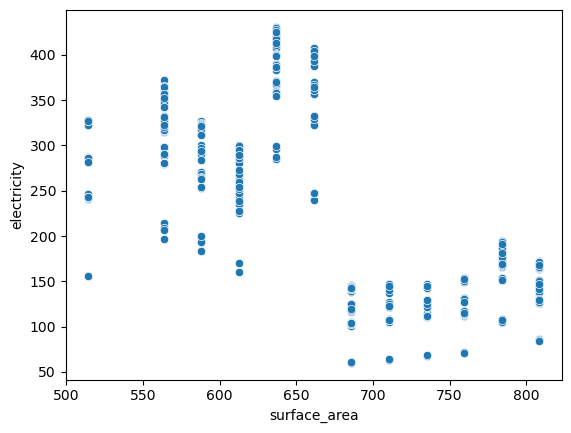

In [52]:
sns.scatterplot(x = TR_Elec['surface_area'], y = TR_Elec['electricity'])
plt.show()

* Test Data

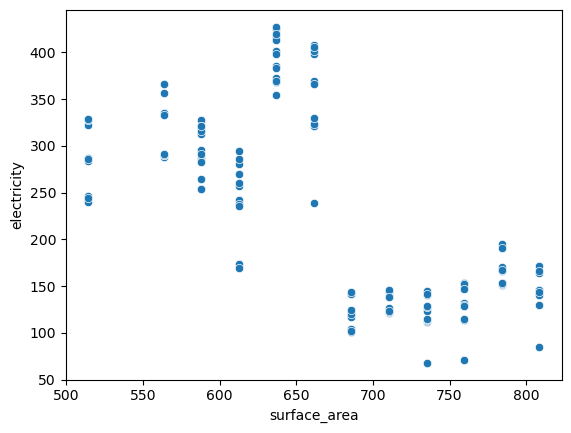

In [53]:
sns.scatterplot(x=TE_Elec['surface_area'], y = TE_Elec['electricity'])
plt.show()

### 1차 모델 Testing Error

* Train_Data로 모델 생성

In [54]:
from sklearn.linear_model import LinearRegression

Model_1 = LinearRegression()
Model_1.fit(X_train, y_train)

LinearRegression()

* Test_Data로 y_hat(예측값) 생성

In [55]:
y_hat_1 = Model_1.predict(X_test)

y_hat_1.shape

(154,)

* Test_Data로 MSE(Mean Squared Error) 계산

In [56]:
from sklearn.metrics import mean_squared_error

TE_Err_1 = mean_squared_error(y_test, y_hat_1)
TE_Err_1

6044.17654762927

### 5차 모델 Testing Error

* Train_Data로 모델 생성

In [57]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree = 5, include_bias = False)
PX_5_TR = poly.fit_transform(X_train)

In [58]:
from sklearn.linear_model import LinearRegression

Model_5 = LinearRegression()
Model_5.fit(PX_5_TR, y_train)

LinearRegression()

* Test_Data로 y_hat(예측값) 생성

In [60]:
PX_5_TE = poly.transform(X_test)

y_hat_5 = Model_5.predict(PX_5_TE)

* Test_Data로 MSE(Mean Squared Error) 계산

In [61]:
from sklearn.metrics import mean_squared_error

TE_Err_5 = mean_squared_error(y_test, y_hat_5)
TE_Err_5

4330.602862899525

### 9차 모델 Testing Error

* Train_Data로 모델 생성

In [62]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree = 9, include_bias = False)
PX_9_TR = poly.fit_transform(X_train)

In [63]:
from sklearn.linear_model import LinearRegression

Model_9 = LinearRegression()
Model_9.fit(PX_9_TR, y_train)

LinearRegression()

* Test_Data로 y_hat(예측값) 생성

In [64]:
PX_9_TE = poly.transform(X_test)

y_hat_9 = Model_9.predict(PX_9_TE)

* Test_Data로 MSE(Mean Squared Error) 계산

In [65]:
from sklearn.metrics import mean_squared_error

TE_Err_9 = mean_squared_error(y_test, y_hat_9)
TE_Err_9

4238.689067126334

### 3개 모델 Testing Error 비교

In [66]:
print('1차 모델 : ', TE_Err_1)
print('5차 모델 : ', TE_Err_5)
print('9차 모델 : ', TE_Err_9)

1차 모델 :  6044.17654762927
5차 모델 :  4330.602862899525
9차 모델 :  4238.689067126334


## Validation Approach
* import Packages

In [67]:
import pandas as pd

* pandas DataFrame

In [68]:
url = 'https://raw.githubusercontent.com/rusita-ai/pyData/master/Electric.csv'

Elec = pd.read_csv(url)

Elec.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   compactness                768 non-null    float64
 1   surface_area               768 non-null    float64
 2   wall_area                  768 non-null    float64
 3   roof_area                  768 non-null    float64
 4   height                     768 non-null    float64
 5   orientation                768 non-null    int64  
 6   glazing_area               768 non-null    float64
 7   glazing_area_distribution  768 non-null    int64  
 8   electricity                768 non-null    float64
dtypes: float64(7), int64(2)
memory usage: 54.1 KB


### Train vs. Validation vs. Test
* 6:2:2 Split(462:153:153)

#### sklearn Package 사용
* train_test_split( )

* 20% Test_Data(153)

In [69]:
## from sklearn.model_selection import train_test_split

X_remain, X_test, y_remain, y_test = train_test_split(Elec[['surface_area']], 
                                                      Elec['electricity'], 
                                                      test_size = int(len(Elec) * 0.2),
                                                      random_state = 2045)

print(X_remain.shape, y_remain.shape)
print(X_test.shape, y_test.shape)

(615, 1) (615,)
(153, 1) (153,)


* 60% Train_Data(462) & 20% Validation_Data(153)

In [70]:
# 남은 80%학습데이터에서 나머지 20%(전체 길이 기준)를 또 추출
X_train, X_valid, y_train, y_valid = train_test_split(X_remain, y_remain, 
                                                      test_size = int(len(Elec) * 0.2), 
                                                      random_state = 2045)

print(X_train.shape, y_train.shape)
print(X_valid.shape, y_valid.shape)
print(X_test.shape, y_test.shape)

(462, 1) (462,)
(153, 1) (153,)
(153, 1) (153,)


* 추후에 모델 학습 메서드의 validation인자를 통해 쉽게 검증 데이터를 분리할 수 있음

### 5차 모델 Validation Error

* Train_Data로 모델 생성

In [71]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree = 5, include_bias = False)
PX_5_TR = poly.fit_transform(X_train)

In [72]:
from sklearn.linear_model import LinearRegression

Model_5 = LinearRegression()
Model_5.fit(PX_5_TR, y_train)

LinearRegression()

* Validation_Data로 y_hat(예측값) 생성 및 MSE 계산

In [73]:
PX_5_VD = poly.transform(X_valid)

y_hat_5 = Model_5.predict(PX_5_VD)

In [74]:
from sklearn.metrics import mean_squared_error

MSE_5 = mean_squared_error(y_valid, y_hat_5)
MSE_5

4136.408127497497

### 9차 모델 Validation Error

* Train_Data로 모델 생성

In [75]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree = 9, include_bias = False)
PX_9_TR = poly.fit_transform(X_train) 
#fit을 사용하여 X_train의 특성을 반영한 모델링을 함

In [76]:
Model_9 = LinearRegression()
Model_9.fit(PX_9_TR, y_train)

LinearRegression()

* Validation_Data로 y_hat(예측값) 생성 및 MSE 계산

In [77]:
PX9_valid = poly.transform(X_valid) 
#검증용으로 사용하는 것이기 때문에 fit을 사용하면 안됨. fit을 쓰게 되면 X_valid의 특성이 반영됨

y_hat_9 = Model_9.predict(PX9_valid)

In [78]:
MSE_9 = mean_squared_error(y_valid, y_hat_9)
MSE_9

3955.97331244136

### 2개 모델 Validation Error 비교

In [79]:
print('5차 모델 MSE_5  : ', MSE_5)
print('9차 모델 MSE_9  : ', MSE_9)

5차 모델 MSE_5  :  4136.408127497497
9차 모델 MSE_9  :  3955.97331244136


### 4) 최종 9차 모델을 Test_Data에 적용

* Test_Data로 y_hat(예측값) 생성 및 MSE 계산

In [80]:
PX9_TE = poly.transform(X_test)

mean_squared_error(y_test, Model_9.predict(PX9_TE))

4220.885732078843

# The End 